In [22]:
from pyscf import gto, scf
#import os
import numpy as np
from matplotlib import pyplot as plt

d1 = 5
atom1 = f'''
H 0 0 0
H {d1} 0 0
'''

mol1 = gto.Mole(
verbose=3,
atom=atom1,
basis='sto-6g',
)

mol1.build()
mf1 = scf.RHF(mol1)
mf1.kernel()

d2 = 6
atom2 = f'''
H 0 0 0
H {d2} 0 0
'''

mol2 = gto.Mole(
verbose=3,
atom=atom2,
basis='sto-6g',
)

mol2.build()
mf2 = scf.RHF(mol2)
mf2.kernel()

print('the rhf energy difference is: ',mf1.e_tot-mf2.e_tot)

converged SCF energy = -0.608011090138909
converged SCF energy = -0.598734521682789
the rhf energy difference is:  -0.00927656845612057


In [25]:
print(mf1.mo_coeff)
print(mf2.mo_coeff)

[[ 0.70696767  0.70724598]
 [ 0.70696767 -0.70724598]]
[[ 0.70709316 -0.7071204 ]
 [ 0.70709316  0.7071204 ]]


In [23]:
from ad_afqmc import pyscf_interface, driver, mpi_jax

mo_file1="mo1.npz"
amp_file1="amp1.npz"
chol_file1="chol1"
pyscf_interface.prep_afqmc(mf1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
mo_file2="mo2.npz"
amp_file2="amp2.npz"
chol_file2="chol2"
pyscf_interface.prep_afqmc(mf2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

#
# Preparing AFQMC calculation
# Calculating Cholesky integrals
# Finished calculating Cholesky integrals
#
# Size of the correlation space:
# Number of electrons: (1, 1)
# Number of basis functions: 2
# Number of Cholesky vectors: 2
#
#
# Preparing AFQMC calculation
# Calculating Cholesky integrals
# Finished calculating Cholesky integrals
#
# Size of the correlation space:
# Number of electrons: (1, 1)
# Number of basis functions: 2
# Number of Cholesky vectors: 2
#


In [3]:
from functools import partial
from typing import List, Optional, Union

#import jax
import jax.numpy as jnp
import numpy as np
#from jax import dtypes, jvp, random, vjp

from ad_afqmc import sampling

print = partial(print, flush=True)

options1 = {
    "dt": 0.005,
    "n_eql": 4,
    "n_ene_blocks": 1,
    "n_sr_blocks": 10,
    "n_blocks": 200,
    "n_walkers": 100,
    "seed": 98,
    "walker_type": "rhf",
    "trial": "rhf",
}

options2 = {
    "dt": 0.005,
    "n_eql": 4,
    "n_ene_blocks": 1,
    "n_sr_blocks": 10,
    "n_blocks": 200,
    "n_walkers": 100,
    "seed": 2,
    "walker_type": "rhf",
    "trial": "rhf",
}

In [4]:
afqmc1 = (mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1))
e_afqmc1, err_afqmc1 = driver.afqmc(*afqmc1)

# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 100
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Equilibration sweeps:
#   Iter        Block energy      Walltime
#     0      -6.080111239e-01     1.82e+00 
#     1      -7.297742963e-01     4.86e+00 
#     2      -7.685103416e-01     6.86e+00 
#     3      -7.857571840e-01     7.15e+00 
#     4      -7.550288439e-01     7.43e+00 
#
# Sampling sweeps:
#  Iter        Mean energy          Stochastic error       Walltime
     0      -7.321466804e-01                -              9.53e+00 
    20      -7.580459428e-01        6.513991818e-03        1.14e+01 
    40      -7.657962905e-01        6.062317460e-03        1.32e+01 
    60      -7.644420788e-01        

In [5]:
afqmc2 = (mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2))
e_afqmc2, err_afqmc2 = driver.afqmc(*afqmc2)

# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 100
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Equilibration sweeps:
#   Iter        Block energy      Walltime
#     0      -5.987345221e-01     3.74e-01 
#     1      -7.404199243e-01     7.69e-01 
#     2      -7.561737299e-01     1.14e+00 
#     3      -7.454556227e-01     1.55e+00 
#     4      -8.146657348e-01     2.20e+00 
#
# Sampling sweeps:
#  Iter        Mean energy          Stochastic error       Walltime
     0      -7.118032575e-01                -              2.36e+00 
    20      -7.491318401e-01                -              4.96e+00 
    40      -7.520079470e-01        9.345096885e-03        6.38e+00 
    60      -7.493756886e-01        6

In [6]:
afqmc_en_diff = e_afqmc1 - e_afqmc2
afqmc_en_diff_err = np.sqrt(err_afqmc1**2+err_afqmc2**2)
print(f'the afqmc energy difference is {afqmc_en_diff}, error is {afqmc_en_diff_err}')

the afqmc energy difference is -0.007918289443799909, error is 0.004141828721224389


In [7]:
from dataclasses import dataclass
from functools import partial
from typing import Any, Tuple

import jax
import jax.numpy as jnp
from jax import checkpoint, jit, lax, random

from ad_afqmc import linalg_utils
from ad_afqmc.hamiltonian import hamiltonian
from ad_afqmc.propagation import propagator
from ad_afqmc.wavefunctions import wave_function

sampler_eq = sampling.sampler(n_prop_steps=50, n_ene_blocks=5, n_sr_blocks=10)

def init_prop(ham_data, ham, prop, trial, wave_data, options, MPI):
    comm = MPI.COMM_WORLD
    #size = comm.Get_size()
    rank = comm.Get_rank()
    seed = options["seed"]
    #neql = options["n_eql"]
    init_walkers: Optional[Union[List, jax.Array]] = None
    trial_rdm1 = trial.get_rdm1(wave_data)
    if "rdm1" not in wave_data:
        wave_data["rdm1"] = trial_rdm1
    ham_data = ham.build_measurement_intermediates(ham_data, trial, wave_data)
    ham_data = ham.build_propagation_intermediates(ham_data, prop, trial, wave_data)
    prop_data = prop.init_prop_data(trial, wave_data, ham_data, init_walkers)
    prop_data["key"] = random.PRNGKey(seed + rank)
    prop_data["n_killed_walkers"] = 0
    print(f"# initial energy: {prop_data['e_estimate']:.9e}")
    
    return prop_data, ham_data

def en_samples(prop_data,ham_data,prop,trial,wave_data):
    energy_samples = jnp.real(
        trial.calc_energy(prop_data["walkers"], ham_data, wave_data)
    )
    energy_samples = jnp.where(
        jnp.abs(energy_samples - prop_data["e_estimate"]) > jnp.sqrt(2.0 / prop.dt),
        prop_data["e_estimate"],
        energy_samples,
    )
    return energy_samples

def block_en_weight(prop_data,ham_data,prop,trial,wave_data):

    energy_samples = en_samples(prop_data,ham_data,prop,wave_data,trial)

    block_weight = jnp.sum(prop_data["weights"])
    block_energy = jnp.sum(energy_samples * prop_data["weights"]) / block_weight
    return block_energy, block_weight

def field_block_scan(
        prop_data: dict,
        fields,
        ham_data: dict,
        prop: propagator,
        trial: wave_function,
        wave_data: dict,
        ) -> Tuple[dict, Tuple[jax.Array, jax.Array]]:
    """Block scan function for a given field"""
    _step_scan_wrapper = lambda x, y: sampler_eq._step_scan(
        x, y, ham_data, prop, trial, wave_data
    )
    prop_data, _ = lax.scan(_step_scan_wrapper, prop_data, fields)
    prop_data["n_killed_walkers"] += prop_data["weights"].size - jnp.count_nonzero(
        prop_data["weights"]
    )
    prop_data = prop.orthonormalize_walkers(prop_data)
    prop_data["overlaps"] = trial.calc_overlap(prop_data["walkers"], wave_data)

    block_energy,_ = block_en_weight(prop_data,ham_data,prop,wave_data,trial)
    prop_data["pop_control_ene_shift"] = (
        0.9 * prop_data["pop_control_ene_shift"] + 0.1 * block_energy
    )
    return prop_data

def cs_block_scan(
        prop_data1: dict,
        ham_data1: dict,
        prop1: propagator,
        trial1: wave_function,
        wave_data1: dict,
        prop_data2: dict,
        ham_data2: dict,
        prop2: propagator,
        trial2: wave_function,
        wave_data2: dict):
    '''correlated sampling of two blocks over the same field'''
    prop_data1["key"], subkey1 = random.split(prop_data1["key"])
    fields = random.normal(
        subkey1,
        shape=(
            sampler_eq.n_prop_steps,
            prop1.n_walkers,
            ham_data1["chol"].shape[0],
        )
    )
    prop_data1 = field_block_scan(prop_data1,fields,ham_data1,prop1,trial1,wave_data1)
    prop_data2 = field_block_scan(prop_data2,fields,ham_data2,prop2,trial2,wave_data2)

    return prop_data1, prop_data2, fields

def ucs_block_scan(
        prop_data1: dict,
        ham_data1: dict,
        prop1: propagator,
        trial1: wave_function,
        wave_data1: dict,
        prop_data2: dict,
        ham_data2: dict,
        prop2: propagator,
        trial2: wave_function,
        wave_data2: dict):
    '''correlated sampling of two blocks over the same field'''
    prop_data1["key"], subkey1 = random.split(prop_data1["key"])
    fields1 = random.normal(
        subkey1,
        shape=(
            sampler_eq.n_prop_steps,
            prop1.n_walkers,
            ham_data1["chol"].shape[0],
        )
    )
    prop_data1 = field_block_scan(prop_data1,fields1,ham_data1,prop1,trial1,wave_data1)

    prop_data2["key"], subkey2 = random.split(prop_data2["key"])
    fields2 = random.normal(
        subkey2,
        shape=(
            sampler_eq.n_prop_steps,
            prop2.n_walkers,
            ham_data2["chol"].shape[0],
        )
    )
    prop_data2 = field_block_scan(prop_data2,fields2,ham_data2,prop2,trial2,wave_data2)

    return prop_data1, prop_data2, fields1, fields2

In [26]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

# comm = MPI.COMM_WORLD
# size = comm.Get_size()
# rank = comm.Get_rank()
# seed1 = options1["seed"]
# seed2 = options2["seed"]
# neql1 = options1["n_eql"]
# neql2 = options2["n_eql"]
# init_walkers: Optional[Union[List, jax.Array]] = None
# ham_data1 = ham1.build_measurement_intermediates(ham_data1, trial1, wave_data1)
# ham_data1 = ham1.build_propagation_intermediates(ham_data1, prop1, trial1, wave_data1)
# prop_data1 = prop1.init_prop_data(trial1, wave_data1, ham_data1, init_walkers)
# prop_data1["key"] = random.PRNGKey(seed1 + rank)
# ham_data2 = ham2.build_measurement_intermediates(ham_data2, trial2, wave_data2)
# ham_data2 = ham2.build_propagation_intermediates(ham_data2, prop2, trial2, wave_data2)
# prop_data2 = prop2.init_prop_data(trial2, wave_data2, ham_data2, init_walkers)
# prop_data2["key"] = random.PRNGKey(seed2 + rank)

n_iter = 0

# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 100
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 100
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -6.080111239e-01
# initial energy: -5.987345221e-01


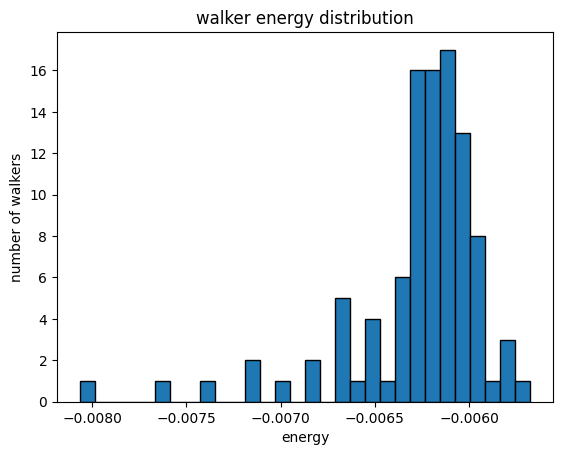

the standard devrivation is 0.00036578378773692084


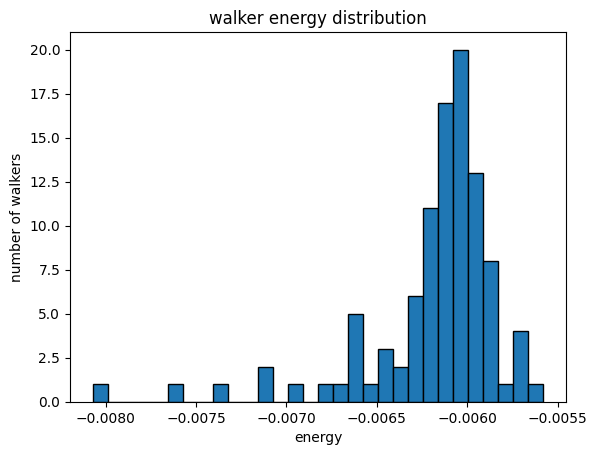

the standard devrivation is 0.0003835394412267855


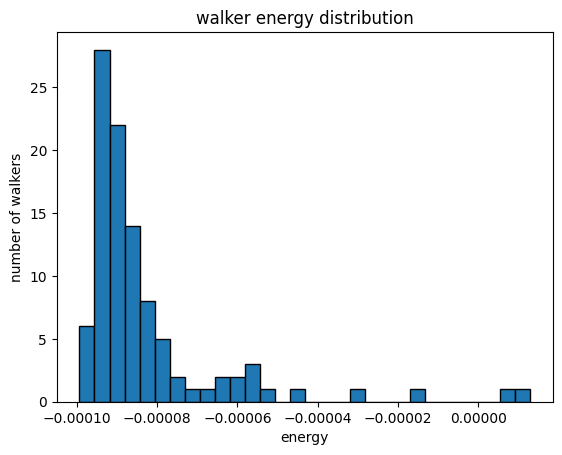

iteration 1
random field [-0.6720124  -0.18607153]
sample1 energy is -0.6271060049963072
sample2 energy is -0.618828982939693
correlated sampling afqmc energy difference is:  -0.008277022056614305
the standard devrivation is 1.9218616153311056e-05


In [9]:
n_iter += 1

prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'random field {fields[0,0]}')
print(f'sample1 energy is {sum(weight_walker_en1)}')
print(f'sample2 energy is {sum(weight_walker_en2)}')
print('correlated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

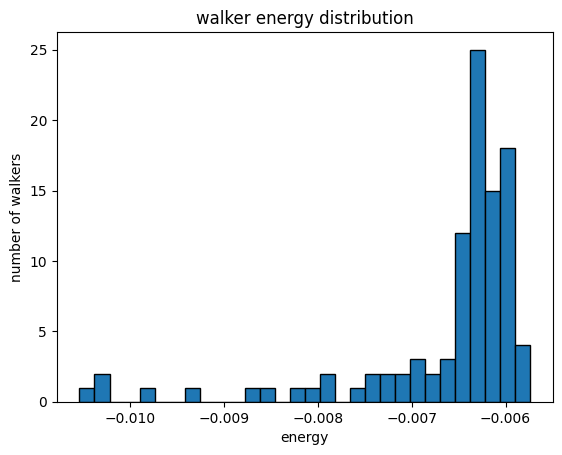

the standard devrivation is 0.000987041736122132


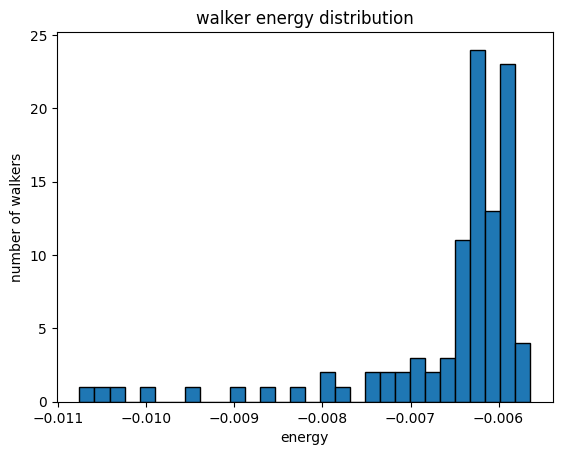

the standard devrivation is 0.0010485086277046511


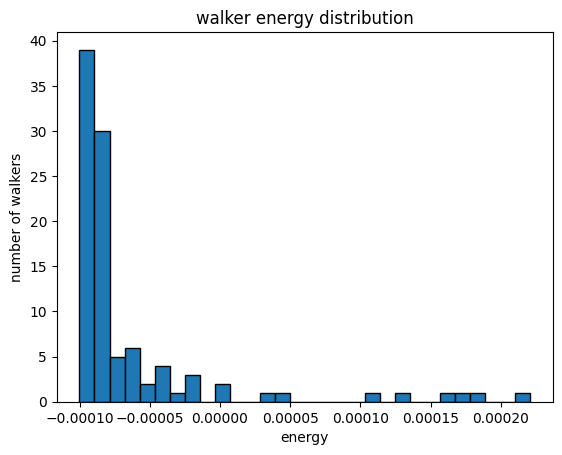

iteration 2
random field [-0.82282189 -0.74511921]
sample1 energy is -0.6620072445550331
sample2 energy is -0.6557260280460158
correlated sampling afqmc energy difference is:  -0.006281216509017717
the standard devrivation is 6.33641374457753e-05


In [10]:
n_iter += 1

prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'random field {fields[0,0]}')
print(f'sample1 energy is {sum(weight_walker_en1)}')
print(f'sample2 energy is {sum(weight_walker_en2)}')
print('correlated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

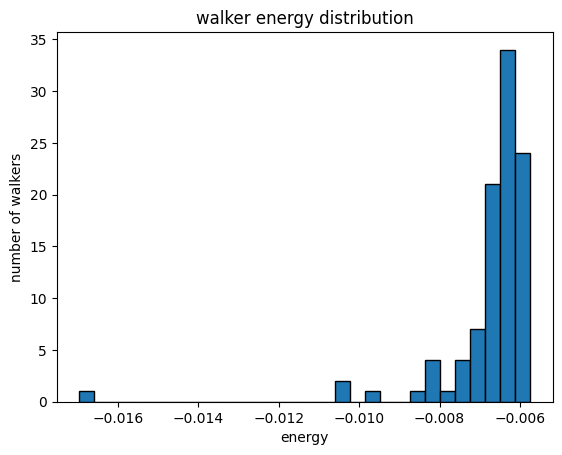

the standard devrivation is 0.0013365825096824514


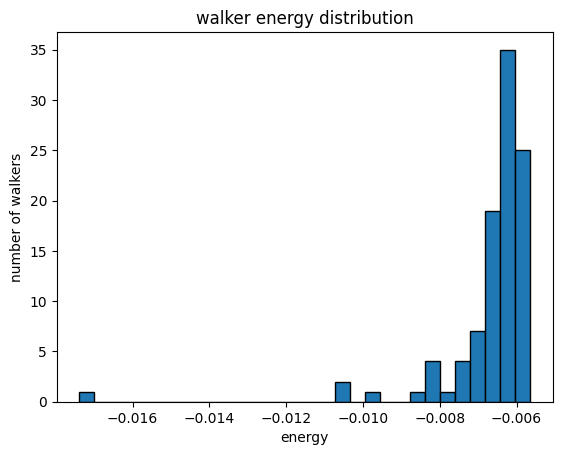

the standard devrivation is 0.0013997547117625443


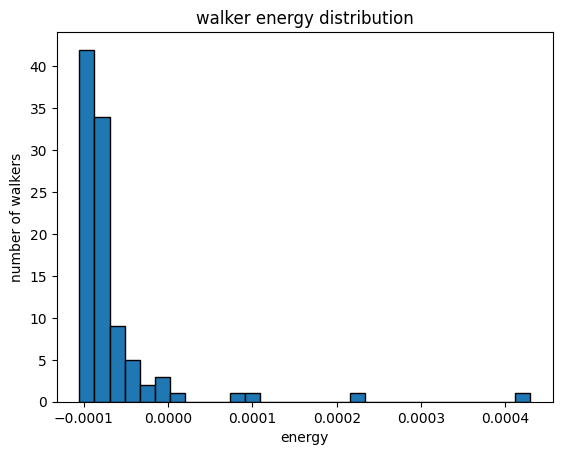

iteration 3
random field [-0.06574155  0.16642683]
sample1 energy is -0.6703522384105297
sample2 energy is -0.6636867900492218
correlated sampling afqmc energy difference is:  -0.00666544836130801
the standard devrivation is 6.6408664811915e-05


In [11]:
n_iter += 1

prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'random field {fields[0,0]}')
print(f'sample1 energy is {sum(weight_walker_en1)}')
print(f'sample2 energy is {sum(weight_walker_en2)}')
print('correlated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

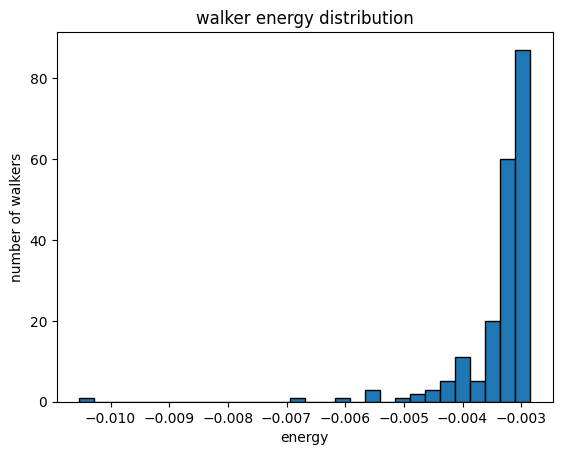

the standard devrivation is 0.0007717969975632735


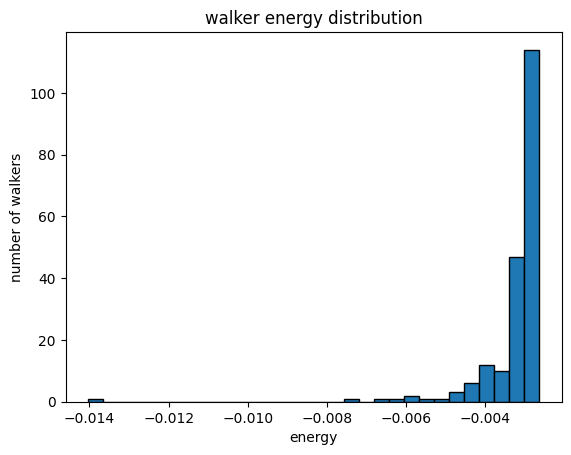

the standard devrivation is 0.0010330865109686937


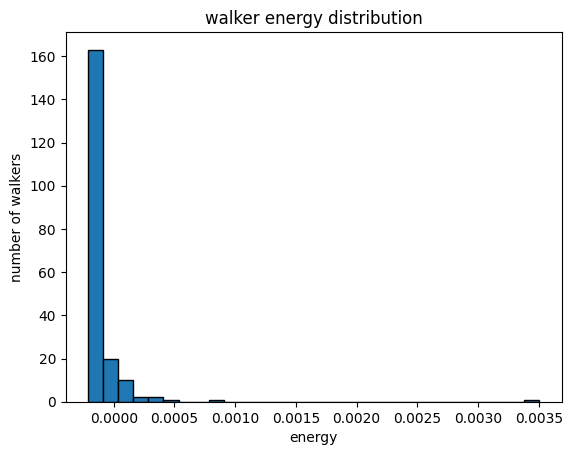

iteration 4
random field [-0.67848295 -0.26216265]
sample1 energy is -0.6765970865896738
sample2 energy is -0.6560152343083895
correlated sampling afqmc energy difference is:  -0.02058185228128394
the standard devrivation is 0.0002857125291859619


In [11]:
n_iter += 1

prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'random field {fields[0,0]}')
print(f'sample1 energy is {sum(weight_walker_en1)}')
print(f'sample2 energy is {sum(weight_walker_en2)}')
print('correlated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

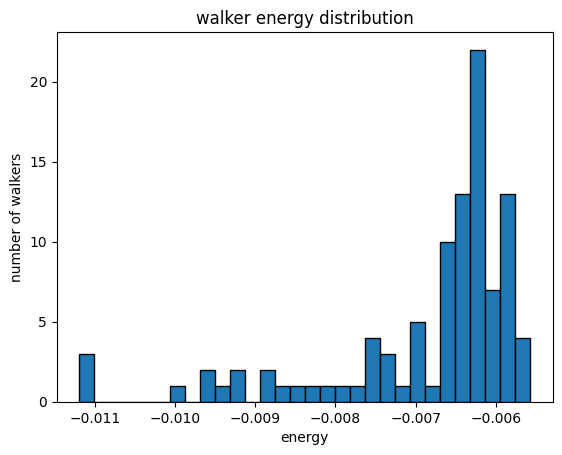

the standard devrivation is 0.0012567321565949423


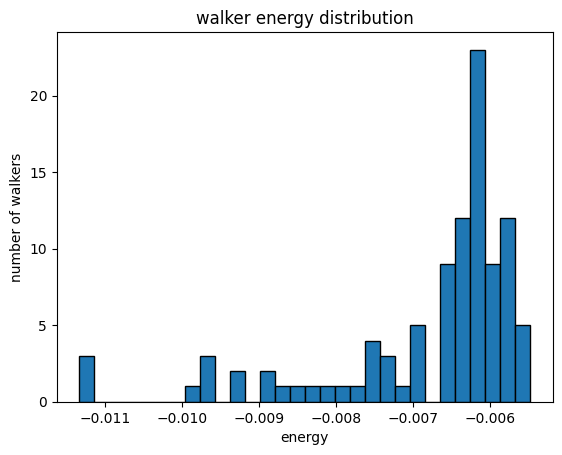

the standard devrivation is 0.0013077319908391415


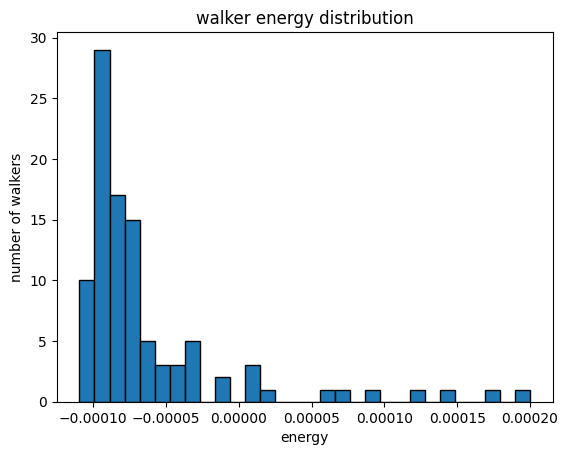

iteration 4
random field [-0.46694493 -0.11534247]
the standard devrivation is 5.860117387337255e-05
correlated sampling afqmc energy difference is:  -0.00616771272847743


In [12]:
n_iter += 1

prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'random field {fields[0,0]}')
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

print('correlated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))

In [13]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

n_iter = 0

# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 100
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 100
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -6.080111239e-01
# initial energy: -5.987345221e-01


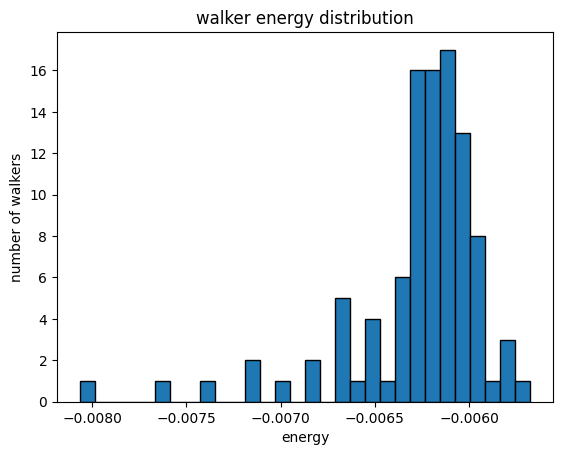

the standard devrivation is 0.00036578378773692084


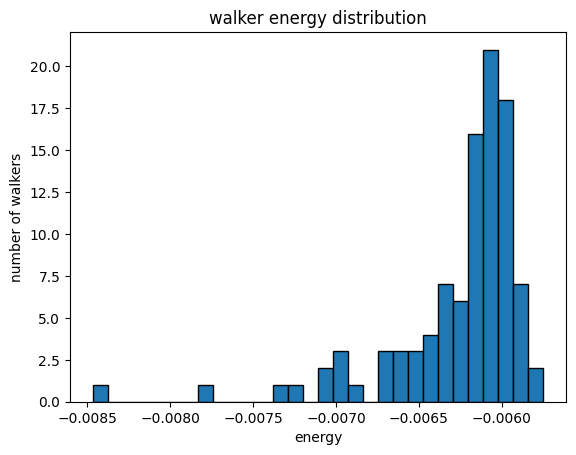

the standard devrivation is 0.00042063320226452003


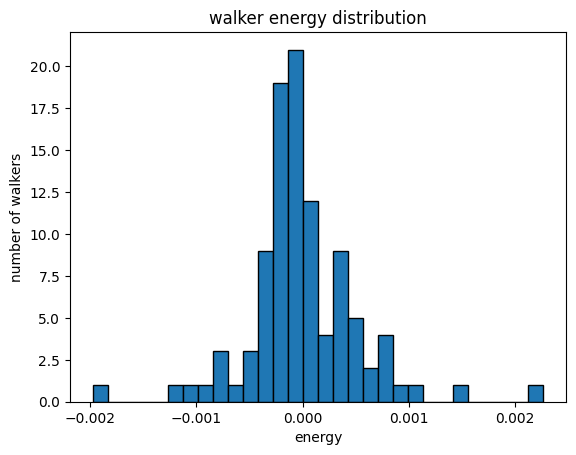

iteration 1
fields1[-0.6720124  -0.18607153] fields2[-1.40215592 -0.36511019]
the standard devrivation is 0.0005229729369290307
uncorrelated sampling afqmc energy difference is:  -0.0011828810507903296


In [14]:
n_iter += 1

prop_data1,prop_data2,fields1,fields2 = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'fields1{fields1[0,0]} fields2{fields2[0,0]}')
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

print('uncorrelated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))

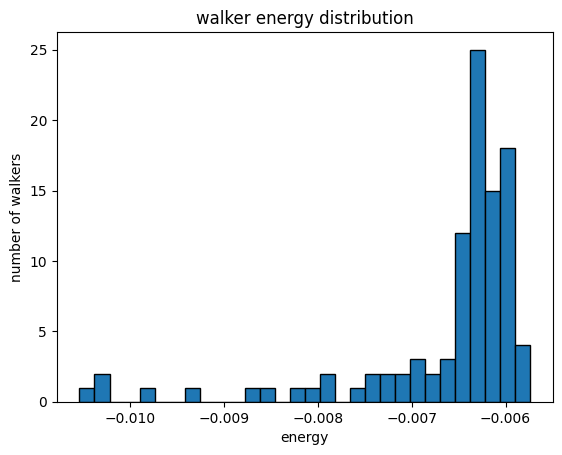

the standard devrivation is 0.000987041736122132


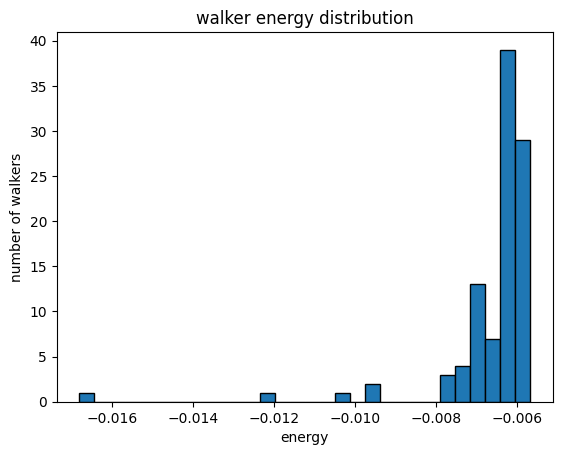

the standard devrivation is 0.0013885941314322342


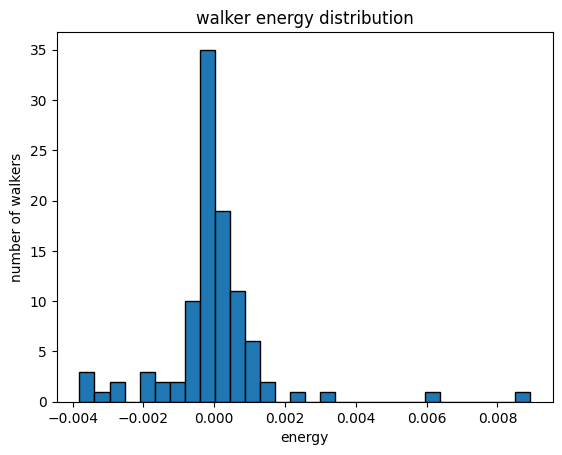

iteration 2
fields1[-0.82282189 -0.74511921] fields2[-0.98615083  0.84911692]
the standard devrivation is 0.0015376806732005674
uncorrelated sampling afqmc energy difference is:  -0.0018414503730577129


In [15]:
n_iter += 1

prop_data1,prop_data2,fields1,fields2 = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'fields1{fields1[0,0]} fields2{fields2[0,0]}')
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

print('uncorrelated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))

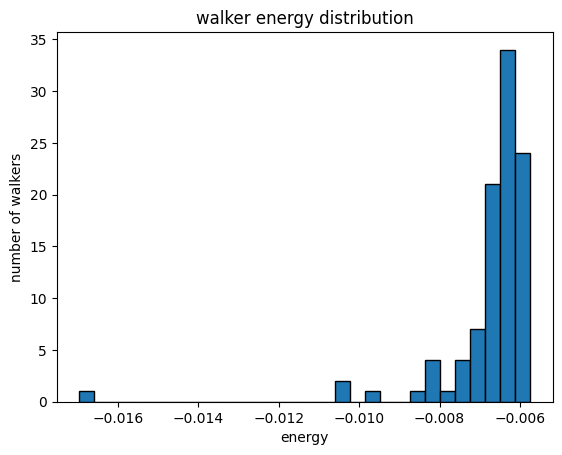

the standard devrivation is 0.0013365825096824514


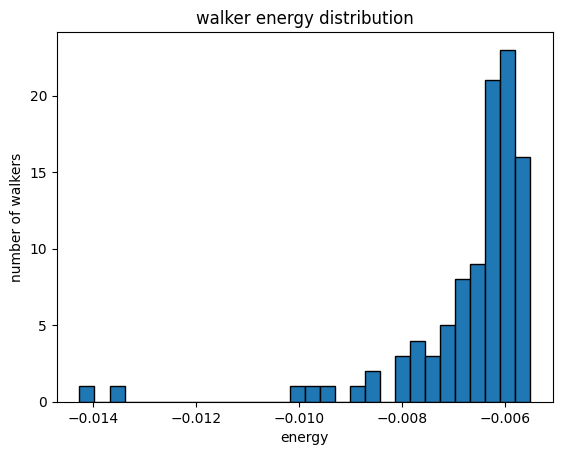

the standard devrivation is 0.0013759706118901132


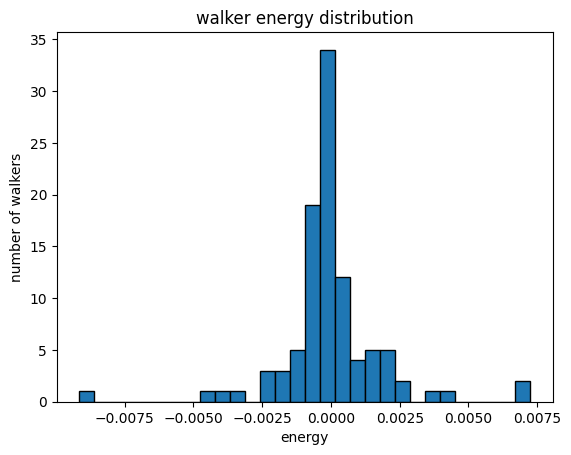

iteration 3
fields1[-0.06574155  0.16642683] fields2[-1.87909512  1.31809467]
the standard devrivation is 0.0018815692762673268
uncorrelated sampling afqmc energy difference is:  -0.004053008147895664


In [16]:
n_iter += 1

prop_data1,prop_data2,fields1,fields2 = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'fields1{fields1[0,0]} fields2{fields2[0,0]}')
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

print('uncorrelated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))

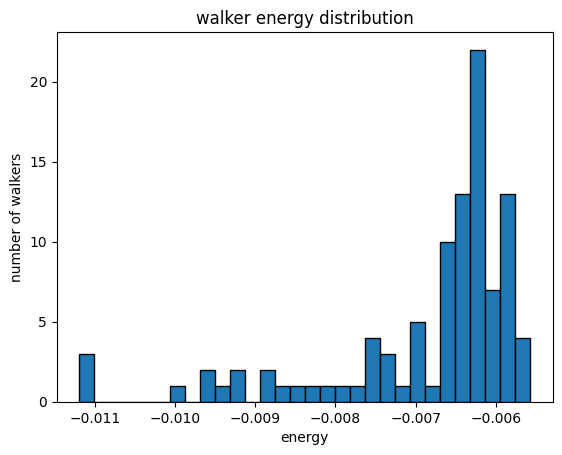

the standard devrivation is 0.0012567321565949423


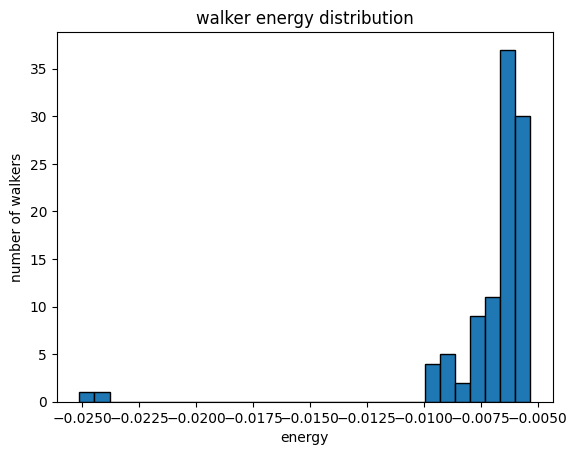

the standard devrivation is 0.002714291522404317


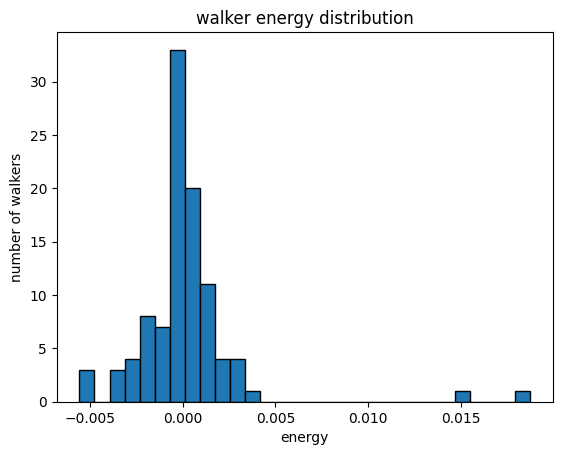

iteration 4
fields1[-0.46694493 -0.11534247] fields2[-1.0443157   0.11181786]
the standard devrivation is 0.002977763627137099
uncorrelated sampling afqmc energy difference is:  0.01140511930805778


In [17]:
n_iter += 1

prop_data1,prop_data2,fields1,fields2 = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'fields1{fields1[0,0]} fields2{fields2[0,0]}')
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

print('uncorrelated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))

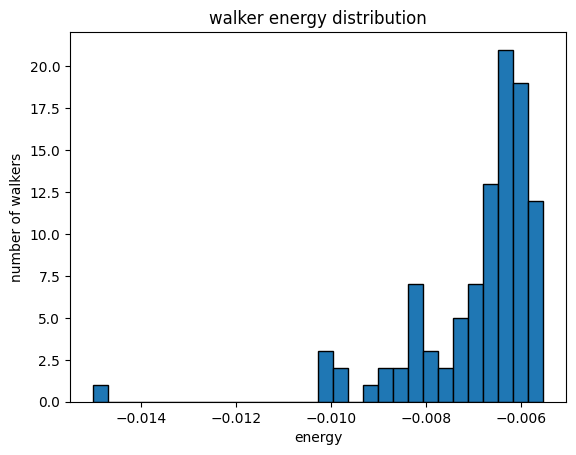

the standard devrivation is 0.0013865840503103043


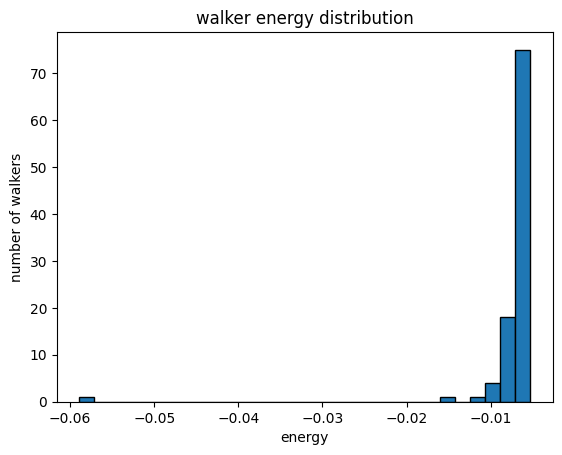

the standard devrivation is 0.005377910467868026


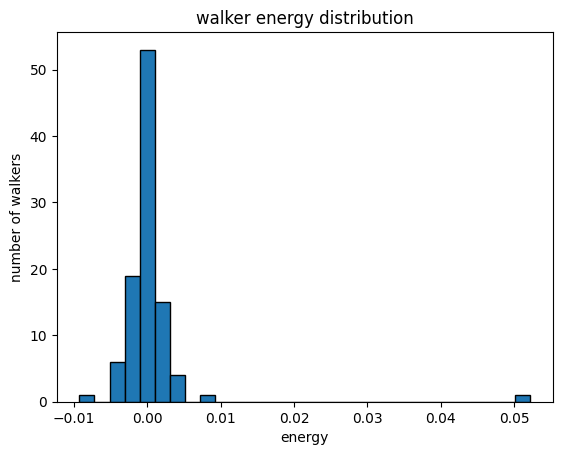

iteration 5
fields1[-0.43615628 -1.79679265] fields2[ 1.82231113 -0.51099978]
the standard devrivation is 0.0056002862922623405
uncorrelated sampling afqmc energy difference is:  0.020746524275020634


In [18]:
n_iter += 1

prop_data1,prop_data2,fields1,fields2 = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'fields1{fields1[0,0]} fields2{fields2[0,0]}')
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

print('uncorrelated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))

In [19]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

steps = np.arange(0, 10, 1)
weight_cwalker_en1 = [0]*10
weight_cwalker_en2 = [0]*10
cwalker_en_diff = [0]*10
weight_cwalker_en_diff_err = [0]*10
for n in steps:
    prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
    energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
    energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
    norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
    norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
    weight_cwalker_en1 = energy_samples1*norm_weight1
    weight_cwalker_en2 = energy_samples2*norm_weight2
    weight_cwalker_en_diff = weight_cwalker_en1 - weight_cwalker_en2
    weight_cwalker_en_diff_err[n] = weight_cwalker_en_diff.std()
    cwalker_en_diff[n] = sum(weight_cwalker_en_diff)


# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 100
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 100
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -6.080111239e-01
# initial energy: -5.987345221e-01


In [20]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

steps = np.arange(0, 10, 1)
#weight_cwalker_en1 = [0]*10
#weight_cwalker_en2 = [0]*10
walker_en_diff = [0]*10
weight_walker_en_diff_err = [0]*10
for n in steps:
    prop_data1,prop_data2,_,_ = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
    energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
    energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
    norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
    norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
    weight_walker_en1 = energy_samples1*norm_weight1
    weight_walker_en2 = energy_samples2*norm_weight2
    weight_walker_en_diff = weight_walker_en1 - weight_walker_en2
    weight_walker_en_diff_err[n] = weight_walker_en_diff.std()
    walker_en_diff[n] = sum(weight_walker_en_diff)

# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 100
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 100
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -6.080111239e-01
# initial energy: -5.987345221e-01


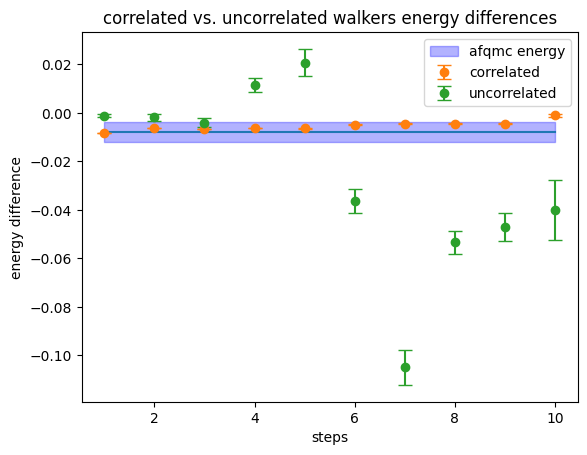

In [21]:
x_steps = np.linspace(1,10,100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc energy')
plt.errorbar(steps+1,cwalker_en_diff,yerr=weight_cwalker_en_diff_err, fmt='o', capsize=5,label='correlated')
plt.errorbar(steps+1,walker_en_diff,yerr=weight_walker_en_diff_err, fmt='o', capsize=5,label='uncorrelated')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated vs. uncorrelated walkers energy differences')
plt.legend()
plt.show()